# Ejemplos DBSCAN

In [1]:
import numpy as np

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def find_neighbors(X, point_index, eps):
    neighbors = []
    for i, point in enumerate(X):
        if euclidean_distance(X[point_index], point) <= eps:
            neighbors.append(i)
    return neighbors

def dbscan(X, eps, min_samples):
    labels = np.full(X.shape[0], -1)  # Inicializar todas las instancias como ruido (-1)
    cluster_label = 0

    for i, point in enumerate(X):
        if labels[i] != -1:  # Si ya está asignado a un cluster, continuar
            continue

        neighbors = find_neighbors(X, i, eps)
        if len(neighbors) < min_samples:  # Si no hay suficientes vecinos, marcar como ruido (-1)
            labels[i] = -1
        else:
            cluster_label += 1
            labels[i] = cluster_label
            expand_cluster(X, labels, i, neighbors, cluster_label, eps, min_samples)

    return labels

def expand_cluster(X, labels, point_index, neighbors, cluster_label, eps, min_samples):
    queue = neighbors.copy()
    i = 0
    while i < len(queue):
        neighbor_index = queue[i]
        if labels[neighbor_index] == -1:  # Si el vecino es ruido, cambiar la etiqueta al cluster actual
            labels[neighbor_index] = cluster_label
        elif labels[neighbor_index] == 0:  # Si el vecino no está asignado a ningún cluster
            labels[neighbor_index] = cluster_label
            neighbor_neighbors = find_neighbors(X, neighbor_index, eps)
            if len(neighbor_neighbors) >= min_samples:
                queue.extend(neighbor_neighbors)
        i += 1

# Datos de ejemplo
X = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6],
              [9, 11], [8, 2], [10, 2], [9, 3]])

# Parámetros de DBSCAN
eps = 2
min_samples = 2

# Ejecutar DBSCAN
labels = dbscan(X, eps, min_samples)
print("Etiquetas finales de los puntos:", labels)


Etiquetas finales de los puntos: [ 1  1 -1 -1  1 -1  2  2  2]


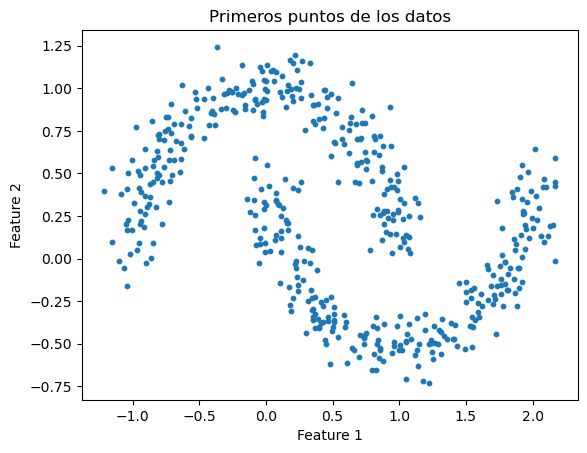

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Generar datos sintéticos con dos lunas
X, _ = make_moons(n_samples=500, noise=0.1, random_state=42)

# Mostrar los primeros puntos de los datos
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title('Primeros puntos de los datos')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


Labels después de ajustar los primeros 50 puntos:
[-1  3  0 -1 -1  0  0 -1  3 -1  2 -1 -1 -1  0  0  1  2 -1 -1  1  1 -1  0
 -1  1  1 -1 -1 -1 -1 -1 -1 -1  2 -1  0  3 -1  3  0 -1  1 -1  2  3  2  2
  0  2]


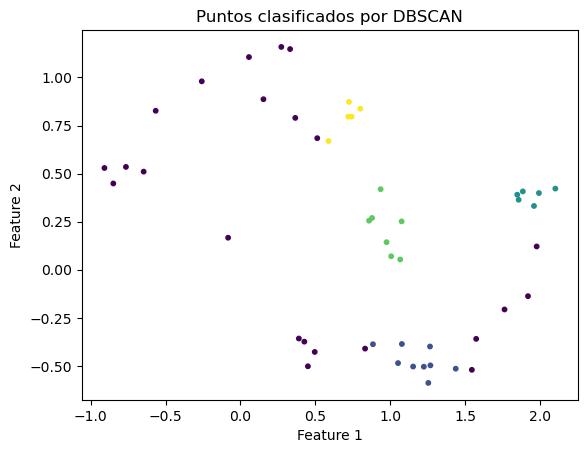

In [3]:
from sklearn.cluster import DBSCAN

# Crear el modelo DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)

# Ajustar el modelo a los primeros puntos de los datos
dbscan.fit(X[:50])

# Mostrar cómo van cambiando las etiquetas de los clusters
print("Labels después de ajustar los primeros 50 puntos:")
print(dbscan.labels_)

# Mostrar los puntos clasificados hasta ahora
plt.scatter(X[:50, 0], X[:50, 1], c=dbscan.labels_[:50], s=10)
plt.title('Puntos clasificados por DBSCAN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


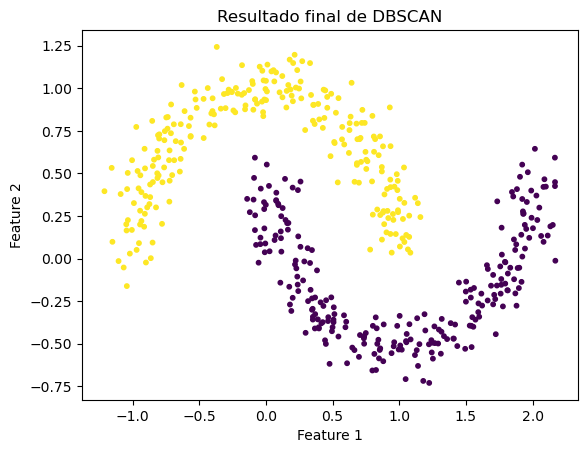

In [4]:
# Ajustar el modelo a todos los datos
dbscan.fit(X)

# Obtener las etiquetas de los clusters y los puntos ruidosos
labels = dbscan.labels_

# Plot de los resultados finales
plt.scatter(X[:, 0], X[:, 1], c=labels, s=10)
plt.title('Resultado final de DBSCAN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


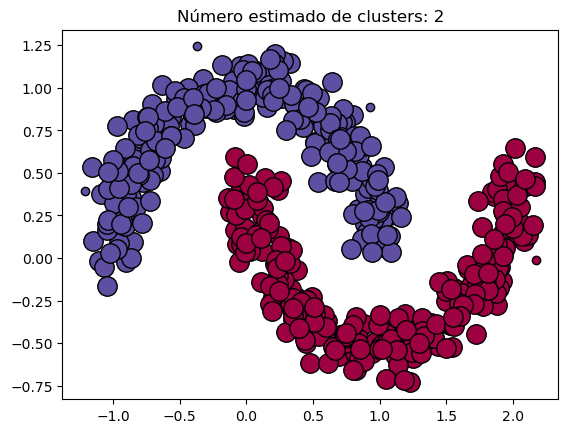

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Generar datos sintéticos con dos lunas
X, _ = make_moons(n_samples=500, noise=0.1, random_state=42)

# Crear el modelo DBSCAN
dbscan_scikit = DBSCAN(eps=0.2, min_samples=5)

# Ajustar el modelo a los datos
dbscan_scikit.fit(X)

# Obtener las etiquetas de los clusters y los puntos ruidosos
labels = dbscan_scikit.labels_
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan_scikit.core_sample_indices_] = True

# Número total de clusters en las etiquetas, ignorando el ruido si está presente.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Plot de los resultados
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Puntos ruidosos en negro
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Número estimado de clusters: %d' % n_clusters_)
plt.show()


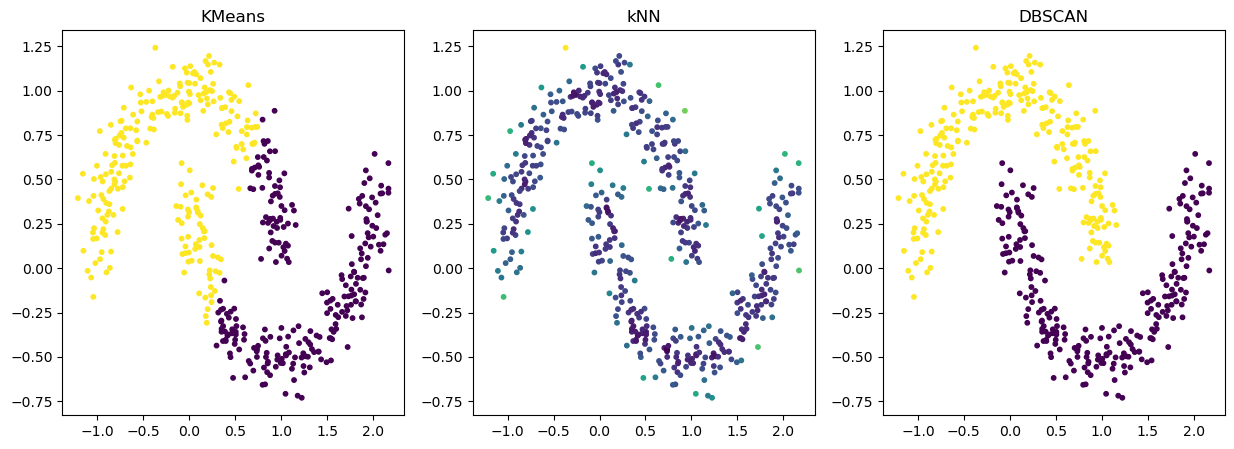

Coeficiente de silueta para KMeans: 0.48254929920930023
Coeficiente de silueta para DBSCAN: 0.32744389724050826


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

# Generar datos sintéticos con dos lunas
X, _ = make_moons(n_samples=500, noise=0.1, random_state=42)

# KMeans
kmeans = KMeans(n_clusters=2, n_init="auto")
kmeans_labels = kmeans.fit_predict(X)

# kNN
knn = NearestNeighbors(n_neighbors=5)
knn.fit(X)
knn_distances, _ = knn.kneighbors(X, return_distance=True)
knn_distances = np.mean(knn_distances, axis=1)

# DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Plot
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=10)
plt.title('KMeans')

plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=knn_distances, cmap='viridis', s=10)
plt.title('kNN')

plt.subplot(1, 3, 3)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', s=10)
plt.title('DBSCAN')

plt.show()

from sklearn.metrics import silhouette_score

# Calcular coeficiente de silueta para KMeans
silhouette_kmeans = silhouette_score(X, kmeans_labels)

# Calcular coeficiente de silueta para kNN
#silhouette_knn = silhouette_score(X, knn_distances)

# Calcular coeficiente de silueta para DBSCAN
silhouette_dbscan = silhouette_score(X, dbscan_labels)

print("Coeficiente de silueta para KMeans:", silhouette_kmeans)
#print("Coeficiente de silueta para kNN:", silhouette_knn)
print("Coeficiente de silueta para DBSCAN:", silhouette_dbscan)


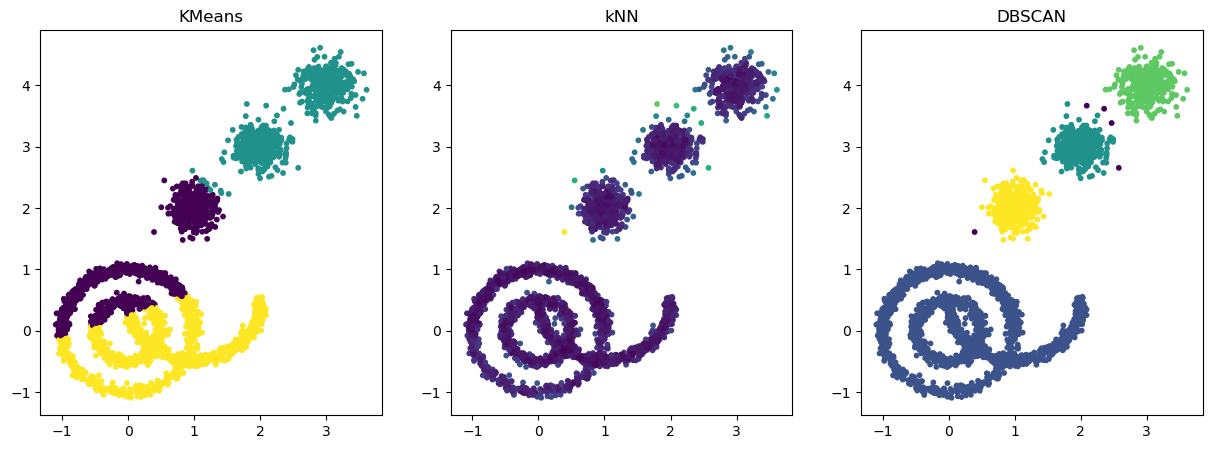

Coeficiente de silueta para KMeans: 0.4124209434897483
Coeficiente de silueta para DBSCAN: 0.5204647626375599


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_moons, make_blobs
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

# Generar datos sintéticos con formas geométricas diferentes
X1, _ = make_circles(n_samples=1000, factor=0.5, noise=0.05)
X2, _ = make_moons(n_samples=1000, noise=0.05)
X3, _ = make_blobs(n_samples=1000, centers=[[1, 2], [2, 3], [3, 4]], cluster_std=0.2)

# Combinar los conjuntos de datos
X = np.vstack([X1, X2, X3])

# KMeans
kmeans = KMeans(n_clusters=3, n_init="auto")
kmeans_labels = kmeans.fit_predict(X)

# kNN
knn = NearestNeighbors(n_neighbors=5)
knn.fit(X)
knn_distances, _ = knn.kneighbors(X, return_distance=True)
knn_distances = np.mean(knn_distances, axis=1)

# DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Plot
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=10)
plt.title('KMeans')

plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=knn_distances, cmap='viridis', s=10)
plt.title('kNN')

plt.subplot(1, 3, 3)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', s=10)
plt.title('DBSCAN')

plt.show()

from sklearn.metrics import silhouette_score

# Calcular coeficiente de silueta para KMeans
silhouette_kmeans = silhouette_score(X, kmeans_labels)

# Calcular coeficiente de silueta para kNN
#silhouette_knn = silhouette_score(X, knn_distances)

# Calcular coeficiente de silueta para DBSCAN
silhouette_dbscan = silhouette_score(X, dbscan_labels)

print("Coeficiente de silueta para KMeans:", silhouette_kmeans)
#print("Coeficiente de silueta para kNN:", silhouette_knn)
print("Coeficiente de silueta para DBSCAN:", silhouette_dbscan)


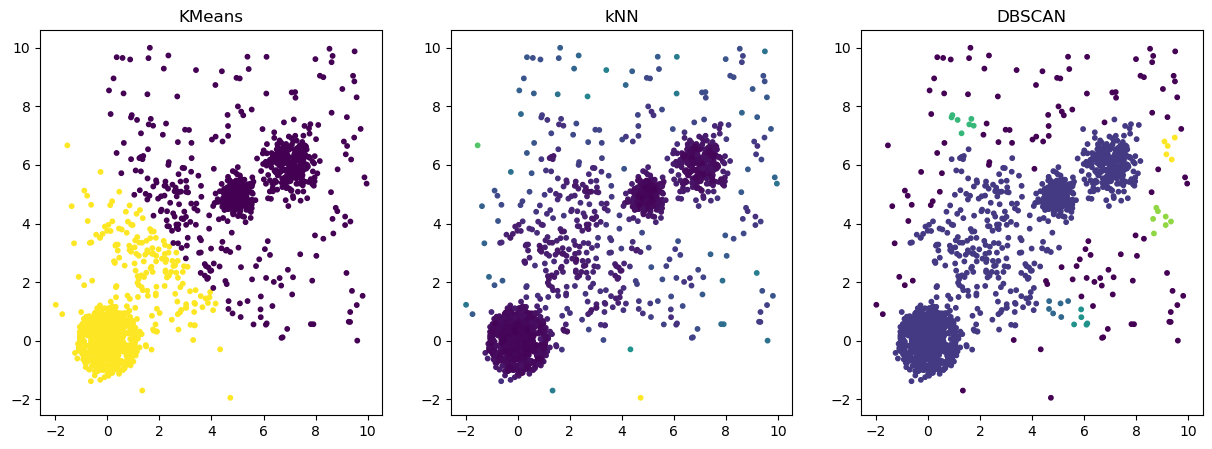

Coeficiente de silueta para KMeans: 0.6753313006561765
Coeficiente de silueta para DBSCAN: -0.09264007092903853


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

# Generar datos sintéticos con formas geométricas diferentes
X1, _ = make_blobs(n_samples=500, centers=[[0, 0], [2, 3]], cluster_std=[0.5, 1.5])
X2, _ = make_circles(n_samples=500, noise=0.1, factor=0.5)
X3, _ = make_blobs(n_samples=500, centers=[[5, 5], [7, 6]], cluster_std=[0.3, 0.5])
X4 = np.random.rand(200, 2) * 10  # Generar puntos dispersos aleatorios

# Combinar los conjuntos de datos
X = np.concatenate([X1, X2, X3, X4])

# KMeans
kmeans = KMeans(n_clusters=2, n_init="auto")
kmeans_labels = kmeans.fit_predict(X)

# kNN
knn = NearestNeighbors(n_neighbors=5)
knn.fit(X)
knn_distances, _ = knn.kneighbors(X, return_distance=True)
knn_distances = np.mean(knn_distances, axis=1)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Plot
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=10)
plt.title('KMeans')

plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=knn_distances, cmap='viridis', s=10)
plt.title('kNN')

plt.subplot(1, 3, 3)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', s=10)
plt.title('DBSCAN')


plt.show()


from sklearn.metrics import silhouette_score

# Calcular coeficiente de silueta para KMeans
silhouette_kmeans = silhouette_score(X, kmeans_labels)

# Calcular coeficiente de silueta para kNN
#silhouette_knn = silhouette_score(X, knn_distances)

# Calcular coeficiente de silueta para DBSCAN
silhouette_dbscan = silhouette_score(X, dbscan_labels)

print("Coeficiente de silueta para KMeans:", silhouette_kmeans)
#print("Coeficiente de silueta para kNN:", silhouette_knn)
print("Coeficiente de silueta para DBSCAN:", silhouette_dbscan)

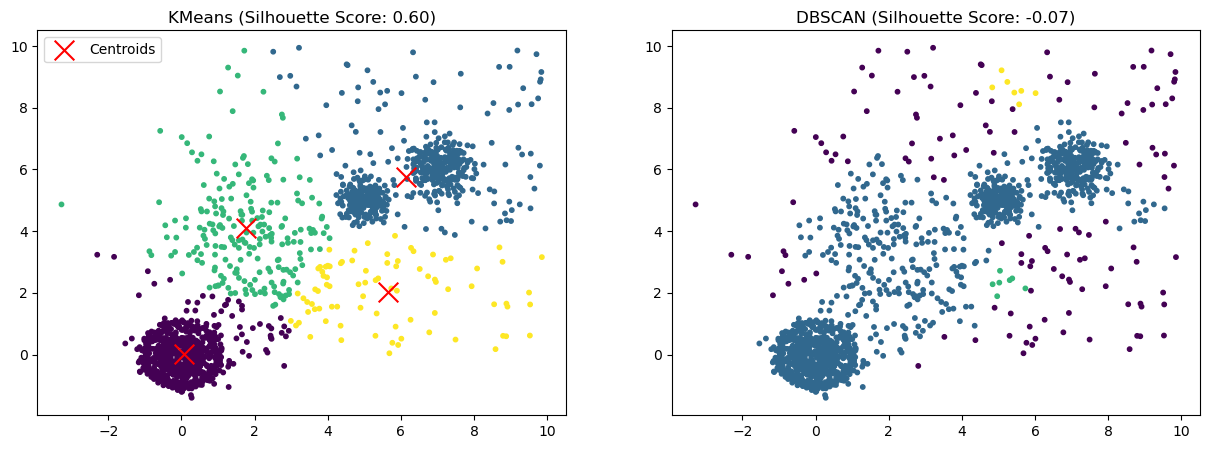

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Generar datos sintéticos con formas geométricas diferentes
X1, _ = make_blobs(n_samples=500, centers=[[0, 0], [2, 3]], cluster_std=[0.5, 1.5])
X2, _ = make_circles(n_samples=500, noise=0.1, factor=0.5)
X3, _ = make_blobs(n_samples=500, centers=[[5, 5], [7, 6]], cluster_std=[0.3, 0.5])
X4 = np.random.rand(200, 2) * 10  # Generar puntos dispersos aleatorios

# Combinar los conjuntos de datos
X = np.concatenate([X1, X2, X3, X4])

# KMeans
kmeans = KMeans(n_clusters=4)
kmeans_labels = kmeans.fit_predict(X)
silhouette_kmeans = silhouette_score(X, kmeans_labels)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)
if len(np.unique(dbscan_labels)) > 1:  # Verificar que haya más de un clúster
    silhouette_dbscan = silhouette_score(X, dbscan_labels)
else:
    silhouette_dbscan = None

# Plot
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=10)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, color='red', label='Centroids')
plt.title(f'KMeans (Silhouette Score: {silhouette_kmeans:.2f})')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', s=10)
plt.title(f'DBSCAN (Silhouette Score: {silhouette_dbscan:.2f})')

plt.show()


# Determinar el epsilon del DBSCAN
* Distancia promedio de k-nearest neighbors:
  * Para calcular la distancia promedio de los k-vecinos más cercanos para cada punto, primero se necesita calcular las distancias entre todos los pares de puntos en tu conjunto de datos. Luego, para cada punto, se ordenan las distancias a los demás puntos y toma las k distancias más cortas. Finalmente, calcula el promedio de estas k distancias para cada punto.

* Regla del 5% o 2%:
  * Para la regla del 5%, se ordenan todas las distancias entre puntos de menor a mayor y se selecciona el valor en el percentil 5. Para la regla del 2%, se hace lo mismo pero se selecciona el valor en el percentil 2.

In [10]:
import torch
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.cluster import DBSCAN

z0 = torch.randn(1, 10)  # Ejemplo de z0
z1 = torch.randn(5000, 10)  # Ejemplo de z1
z0_np = z0.cpu().detach().numpy()
z1_np = z1.cpu().detach().numpy()


import numpy as np
from sklearn.neighbors import NearestNeighbors

# Calcula la distancia promedio de k-vecinos más cercanos para cada punto
k = 5  # Número de vecinos más cercanos
nbrs = NearestNeighbors(n_neighbors=k).fit(z1_np)
distances, _ = nbrs.kneighbors(z1_np)
mean_distances = distances[:, 1:].mean()  # Excluimos la distancia al propio punto

# Calcula el percentil 5% y 2% de las distancias entre puntos
percentile_5 = np.percentile(distances[:, 1:], 5)
percentile_2 = np.percentile(distances[:, 1:], 2)

print("Distancia promedio de k-nearest neighbors:", mean_distances)
print("Percentil 5% de las distancias entre puntos:", percentile_5)
print("Percentil 2% de las distancias entre puntos:", percentile_2)





ModuleNotFoundError: No module named 'torch'

In [ ]:
dbscan.labels_

array([ 0,  0,  0, ...,  7, -1, -1])

# Limpieza de datos

## carga de datos

In [11]:
import pandas as pd
crime_data = pd.read_csv('datos/Crime_Data_from_2020_to_Present.csv')
police_station_data = pd.read_csv('datos/Sheriff_and_Police_Stations.csv')

## procesamiento crime data

### Approach inicial

In [12]:
crime_data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [13]:
crime_data.shape

(951608, 28)

In [14]:
crime_data.dropna().shape

(10, 28)

In [15]:
crime_data.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [16]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951608 entries, 0 to 951607
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           951608 non-null  int64  
 1   Date Rptd       951608 non-null  object 
 2   DATE OCC        951608 non-null  object 
 3   TIME OCC        951608 non-null  int64  
 4   AREA            951608 non-null  int64  
 5   AREA NAME       951608 non-null  object 
 6   Rpt Dist No     951608 non-null  int64  
 7   Part 1-2        951608 non-null  int64  
 8   Crm Cd          951608 non-null  int64  
 9   Crm Cd Desc     951608 non-null  object 
 10  Mocodes         816159 non-null  object 
 11  Vict Age        951608 non-null  int64  
 12  Vict Sex        822716 non-null  object 
 13  Vict Descent    822706 non-null  object 
 14  Premis Cd       951597 non-null  float64
 15  Premis Desc     951040 non-null  object 
 16  Weapon Used Cd  324847 non-null  float64
 17  Weapon Des

In [17]:
crime_null_mask = crime_data.count() < 0.5*crime_data.shape[0]

crime_drop_columns = crime_data.loc[:, crime_null_mask]

crime_drop_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951608 entries, 0 to 951607
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Weapon Used Cd  324847 non-null  float64
 1   Weapon Desc     324847 non-null  object 
 2   Crm Cd 2        68396 non-null   float64
 3   Crm Cd 3        2290 non-null    float64
 4   Crm Cd 4        64 non-null      float64
 5   Cross Street    148487 non-null  object 
dtypes: float64(4), object(2)
memory usage: 43.6+ MB


In [18]:
filtered_crime_data = crime_data[crime_data['Crm Cd 2'].notnull() & crime_data['Crm Cd 3'].notnull() & crime_data['Crm Cd 4'].notnull()]

In [19]:
filtered_crime_data[["Crm Cd Desc", "Crm Cd 1", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4"]].head()

,Crm Cd Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4
2197,BRANDISH WEAPON,753.0,761.0,930.0,998.0
4122,ORAL COPULATION,210.0,820.0,910.0,998.0
27522,BURGLARY,310.0,888.0,933.0,998.0
36595,BRANDISH WEAPON,753.0,761.0,930.0,998.0
37570,BRANDISH WEAPON,626.0,761.0,930.0,998.0


In [20]:
crime_drop_columns.head()

,Weapon Used Cd,Weapon Desc,Crm Cd 2,Crm Cd 3,Crm Cd 4,Cross Street
0,NaN,NaN,998.0,NaN,NaN,NaN
1,NaN,NaN,998.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
crime_data.iloc[0]

DR_NO                                           190326475
Date Rptd                          03/01/2020 12:00:00 AM
DATE OCC                           03/01/2020 12:00:00 AM
TIME OCC                                             2130
AREA                                                    7
AREA NAME                                        Wilshire
Rpt Dist No                                           784
Part 1-2                                                1
Crm Cd                                                510
Crm Cd Desc                              VEHICLE - STOLEN
Mocodes                                               NaN
Vict Age                                                0
Vict Sex                                                M
Vict Descent                                            O
Premis Cd                                           101.0
Premis Desc                                        STREET
Weapon Used Cd                                        NaN
Weapon Desc   

In [22]:
len(crime_data['Crm Cd Desc'].unique())

139

In [23]:
crime_data.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,9.516080e+05,951608.000000,951608.000000,951608.000000,951608.000000,951608.000000,951608.000000,951597.000000,324847.000000,951597.000000,68396.000000,2290.000000,64.00000,951608.000000,951608.000000
mean,2.190496e+08,1338.341955,10.719191,1118.360299,1.408414,500.705176,29.421099,306.345652,363.732683,500.451795,958.112960,984.076856,991.21875,33.993038,-118.073178
std,1.256555e+07,652.290381,6.100278,610.080017,0.491541,206.999706,21.900237,217.733925,123.590202,206.792747,110.279437,51.703875,27.06985,1.663752,5.766987
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-4.000000,101.000000,101.000000,110.000000,210.000000,310.000000,821.00000,0.000000,-118.667600
25%,2.105111e+08,900.000000,6.000000,621.000000,1.000000,331.000000,0.000000,101.000000,311.000000,331.000000,998.000000,998.000000,998.00000,34.014500,-118.430700
50%,2.207081e+08,1420.000000,11.000000,1142.000000,1.000000,442.000000,30.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.00000,34.059000,-118.322500
75%,2.307134e+08,1900.000000,16.000000,1619.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.00000,34.164900,-118.274000
max,2.499187e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.00000,34.334300,0.000000


### Comienzo del procesamiento

primero se bucan todas las columnas con valores nulos

In [24]:
crime_anynull_mask = crime_data.count() < crime_data.shape[0]

crime_dropany_columns = crime_data.loc[:, crime_anynull_mask]

crime_dropany_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951608 entries, 0 to 951607
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Mocodes         816159 non-null  object 
 1   Vict Sex        822716 non-null  object 
 2   Vict Descent    822706 non-null  object 
 3   Premis Cd       951597 non-null  float64
 4   Premis Desc     951040 non-null  object 
 5   Weapon Used Cd  324847 non-null  float64
 6   Weapon Desc     324847 non-null  object 
 7   Status          951607 non-null  object 
 8   Crm Cd 1        951597 non-null  float64
 9   Crm Cd 2        68396 non-null   float64
 10  Crm Cd 3        2290 non-null    float64
 11  Crm Cd 4        64 non-null      float64
 12  Cross Street    148487 non-null  object 
dtypes: float64(6), object(7)
memory usage: 94.4+ MB


In [25]:
crime_dropany_columns.head()

,Mocodes,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,Cross Street
0,NaN,M,O,101.0,STREET,NaN,NaN,AA,510.0,998.0,NaN,NaN,NaN
1,1822 1402 0344,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,330.0,998.0,NaN,NaN,NaN
2,0344 1251,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,480.0,NaN,NaN,NaN,NaN
3,0325 1501,M,O,405.0,CLOTHING STORE,NaN,NaN,IC,343.0,NaN,NaN,NaN,NaN
4,1822 1501 0930 2004,M,H,102.0,SIDEWALK,NaN,NaN,IC,354.0,NaN,NaN,NaN,NaN


Tras una invesigación se busca ahondar en el significado de cada columna para realizar el procesamiento adecuado para cada una:

- Mocodes:  [Modus Opeandis Codes](https://www.bolton.ac.uk/blogs/criminal-justice-what-is-a-modus-operandi)
- Vict Sex: Victim Sex
- Vict Descent:  [Victim Race](https://ambarishg.github.io/littlebookdataviz/victim-descent.html)
- Premis Cd: Codigo que identifica el tipo de lugar del crimen
- Premid Desc: Descripcion del tipo de lugar asociado al codigo
- Idem para columnas Weapon.
- Status: Parece ser una descripcion sobre el rango etario y el estado del crimen, pero no es [Concluyente](https://github.com/priyanka21sk/- LA-Crime-Data-Analysis-using-R)
- Crm Cd: Crime codes, parece ser que mintras más crimenes se asocian a un acto, más codigos se le asocian
- Cross Street: [Intersección con calle principal](https://www.merriam-webster.com/dictionary/cross%20street#:~:text=%3A%20a%20street%20intersecting%20a%20main,of%20it%20compare%20side%20street) 

In [26]:
crime_data['Mocodes'] = crime_data['Mocodes'].fillna('Unknown')

In [27]:
crime_data['Mocodes'].value_counts(dropna=False)

Unknown                               135449
0344                                   38838
0329                                   20598
1822 0344                              12780
1501                                    9450
                                       ...  
2004 1218 0345 0334 0344 1822              1
2038 0913 1814 0416                        1
0329 0400 1822 1501 2004 1300              1
0334 0355 0337 1822 0906 0302 0344         1
2047 0400 0429 0444 1202 1822              1
Name: Mocodes, Length: 307303, dtype: int64

Se podria hacer un drop sobre las filas con valor H y -

In [28]:
crime_dropany_columns['Vict Sex'].value_counts()

M    387964
F    345872
X     88772
H       107
-         1
Name: Vict Sex, dtype: int64

In [29]:
# drop all columns from the crime data dataframe where Victim Sex is H or -
crime_data.drop(crime_data[crime_data["Vict Sex"].isin(['H', '-'])].index, inplace=True)


In [50]:
crime_data['Vict Sex'].value_counts(dropna=False)

M      387963
F      345872
NaN    128892
X       88772
Name: Vict Sex, dtype: int64

dropna de valor -

In [52]:
crime_dropany_columns['Vict Descent'].value_counts()

H    287715
W    191824
B    132197
X     97408
O     74870
A     20721
K      5313
F      4203
C      3917
J      1365
V      1033
I       921
Z       488
P       258
U       201
D        81
G        69
L        66
S        54
-         2
Name: Vict Descent, dtype: int64

In [32]:
crime_data.drop(crime_data[crime_data["Vict Descent"].isin(['-'])].index, inplace=True)

In [53]:
crime_data['Vict Descent'].value_counts(dropna=False)

H      287686
W      191814
B      132191
NaN    128902
X       97402
O       74866
A       20720
K        5313
F        4153
C        3917
J        1365
V        1033
I         921
Z         488
P         258
U         201
D          81
G          69
L          65
S          54
Name: Vict Descent, dtype: int64

se observa que no existe el codigo 0 es weapon used cd

In [34]:
crime_dropany_columns['Weapon Used Cd'].value_counts()

400.0    174018
500.0     35419
511.0     23751
102.0     19995
109.0      7218
          ...  
120.0         3
121.0         2
119.0         2
124.0         2
123.0         1
Name: Weapon Used Cd, Length: 79, dtype: int64

In [35]:
(crime_dropany_columns['Weapon Used Cd'] == 0).any()

False

In [36]:
weapon_code_no_weapon = 0 
crime_data['Weapon Used Cd'] = crime_data['Weapon Used Cd'].fillna(weapon_code_no_weapon)
crime_data['Weapon Desc'] = crime_data['Weapon Desc'].fillna('No Weapon')

se revisa para poner codigo 0 como vacio para reemplazar al null.

In [37]:
# print statements that declare if Crm Cd 2, Crm Cd 3, and Crm Cd 4 have any zero values, they have text explaining the meaning of the zero value
print(f"Crime code 1 has 0 values:{(crime_dropany_columns['Crm Cd 1'] == 0).any()}")
print(f"Crime code 2 has 0 values:{(crime_dropany_columns['Crm Cd 2'] == 0).any()}")
print(f"Crime code 3 has 0 values:{(crime_dropany_columns['Crm Cd 3'] == 0).any()}")
print(f"Crime code 4 has 0 values:{(crime_dropany_columns['Crm Cd 4'] == 0).any()}")

Crime code 1 has 0 values:False
Crime code 2 has 0 values:False
Crime code 3 has 0 values:False
Crime code 4 has 0 values:False


In [38]:
crime_data['Crm Cd 1'] = crime_data['Crm Cd 1'].fillna(0)
crime_data['Crm Cd 2'] = crime_data['Crm Cd 2'].fillna(0)
crime_data['Crm Cd 3'] = crime_data['Crm Cd 3'].fillna(0)
crime_data['Crm Cd 4'] = crime_data['Crm Cd 4'].fillna(0)

In [39]:
crime_data['Cross Street'] = crime_data['Cross Street'].fillna('N/A')


In [40]:
crime_data['Status'] = crime_data['Status'].fillna('Unknown')

In [41]:
crime_data['Premis Desc'] = crime_data['Premis Desc'].fillna('Unknown')

In [42]:
print(f"Premise code has 0 values:{(crime_dropany_columns['Premis Cd'] == 0).any()}")

Premise code has 0 values:False


In [43]:
crime_data['Premis Cd'] = crime_data['Premis Cd'].fillna(0)

Observación sobre los cambios generados

In [44]:
processed_crime_anynull_mask = crime_data.count() < crime_data.shape[0]

processed_crime_dropany_columns = crime_data.loc[:, processed_crime_anynull_mask]

processed_crime_dropany_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 951499 entries, 0 to 951607
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Vict Sex      822607 non-null  object
 1   Vict Descent  822597 non-null  object
dtypes: object(2)
memory usage: 21.8+ MB


Notar que para ambas columnas existe el NaN y el X, por lo cual si X determina un "no se puede determinar" el Nan puede ser no se tiene el dato, pero falta metadata para establecer esta determinacion. Se puede asumir lo anterior o realizar un dropna.

## procesamiento police station

In [45]:
police_station_data.head()

,X,Y,OBJECTID,source,ext_id,cat1,cat2,cat3,org_name,name,...,latitude,longitude,date_updated,dis_status,POINT_X,POINT_Y,OBJECTID_1,allcats,nameUrlFriendly,isCounty
0,-118.185705,33.844639,513,211,3034969,Public Safety,Sheriff and Police Stations,NaN,www.longbeach.gov/police/,Long Beach Police Department - North Patrol Di...,...,33.844639,-118.185705,2020/07/14 23:14:10+00,NaN,6.505278e+06,1.765893e+06,0,|Public Safety|Sheriff and Police Stations|,long-beach-police-department---north-patrol-di...,0
1,-118.126663,33.941363,859,Current Services Locator,3038049,Public Safety,Sheriff and Police Stations,NaN,LA County,Downey Police Department,...,33.941363,-118.126663,2020/07/14 23:14:48+00,NaN,6.523252e+06,1.801065e+06,0,|Public Safety|Sheriff and Police Stations|,downey-police-department,0
2,-118.307637,33.883727,1021,211,3039500,Public Safety,Sheriff and Police Stations,NaN,www.gardenapd.org,City Of Gardena Police Department,...,33.883727,-118.307637,2020/07/14 23:14:10+00,NaN,6.468296e+06,1.780209e+06,0,|Public Safety|Sheriff and Police Stations|,city-of-gardena-police-department,0
3,-118.091208,33.946408,1218,211,3041264,Public Safety,Sheriff and Police Stations,NaN,www.chp.ca.gov,California State Highway Patrol - Chp - Santa ...,...,33.946408,-118.091208,2020/07/14 23:14:11+00,NaN,6.534007e+06,1.802890e+06,0,|Public Safety|Sheriff and Police Stations|,california-state-highway-patrol---chp---santa-...,0
4,-117.969381,34.065952,1939,211,3048031,Public Safety,Sheriff and Police Stations,NaN,www.chp.ca.gov,California State Highway Patrol - Chp - Baldwi...,...,34.065952,-117.969381,2020/07/14 23:14:11+00,NaN,6.570944e+06,1.846383e+06,0,|Public Safety|Sheriff and Police Stations|,california-state-highway-patrol---chp---baldwi...,0


In [46]:
police_station_data.columns

Index(['X', 'Y', 'OBJECTID', 'source', 'ext_id', 'cat1', 'cat2', 'cat3',
       'org_name', 'name', 'addrln1', 'addrln2', 'city', 'state', 'hours',
       'phones', 'email', 'url', 'info1', 'info2', 'post_id', 'description',
       'zip', 'link', 'use_type', 'latitude', 'longitude', 'date_updated',
       'dis_status', 'POINT_X', 'POINT_Y', 'OBJECTID_1', 'allcats',
       'nameUrlFriendly', 'isCounty'],
      dtype='object')

In [47]:
police_station_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   X                117 non-null    float64
 1   Y                117 non-null    float64
 2   OBJECTID         117 non-null    int64  
 3   source           117 non-null    object 
 4   ext_id           117 non-null    int64  
 5   cat1             117 non-null    object 
 6   cat2             117 non-null    object 
 7   cat3             12 non-null     object 
 8   org_name         100 non-null    object 
 9   name             117 non-null    object 
 10  addrln1          117 non-null    object 
 11  addrln2          2 non-null      object 
 12  city             117 non-null    object 
 13  state            117 non-null    object 
 14  hours            103 non-null    object 
 15  phones           117 non-null    object 
 16  email            1 non-null      object 
 17  url             

In [48]:
# Step 1: Get the total number of rows
total_rows = len(police_station_data)

# Step 2: Create a mask for columns where non-null count is less than total rows
mask = police_station_data.count() < total_rows

# Step 3: Select columns based on the mask
filtered_columns = police_station_data.loc[:, mask]

# Step 4: Display info for these columns
filtered_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cat3         12 non-null     object 
 1   org_name     100 non-null    object 
 2   addrln2      2 non-null      object 
 3   hours        103 non-null    object 
 4   email        1 non-null      object 
 5   url          115 non-null    object 
 6   info1        0 non-null      float64
 7   info2        0 non-null      float64
 8   description  115 non-null    object 
 9   link         115 non-null    object 
 10  dis_status   0 non-null      float64
dtypes: float64(3), object(8)
memory usage: 10.2+ KB
